# Loading Dataset

In [1]:
import numpy as np
import tensorflow as tf 
import NeuralNetwork as nn
import Optimisers as opt

In [2]:
cifar10 = tf.keras.datasets.cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_test[0].shape
X_batch = X_test[0:10000]
X_batch.shape

(10000, 32, 32, 3)

# Plotting first image in the train dataset.
Just to get a feel of how dataset image looks like or to simply understand the image.

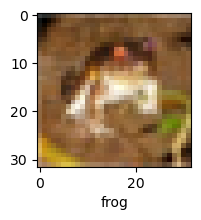

In [3]:
import matplotlib.pyplot as plt

classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
def plot_data(X, y, index):
    plt.figure(figsize=(10, 2))  # Scaling the image
    plt.imshow(X[index])
    plt.xlabel(classes[(y[index])[0]]) # Because y_train[index] return [val]

plot_data(X_train, y_train, 0)

# Embedding the X_train and X_test images into vector.

In [4]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# standardizing the training data
mean = X_train.mean(axis=0, keepdims=True)
std = X_train.std(axis=0, keepdims=True) + 1e-6  # 1e-6 prevents division by zero

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

print(f"X_train mean: {X_train.mean():.6f}, std: {X_train.std():.6f}")
print(f"X_test mean: {X_test.mean():.6f}, std: {X_test.std():.6f}")

# Normalising raw pixels
# X_train = X_train.astype(np.float32) / 255.0
# X_test  = X_test.astype(np.float32) / 255.0


X_train mean: 0.000000, std: 1.000000
X_test mean: 0.012871, std: 0.998512


# One hot y_labels before training.
My backward pass assumes one hot labels during gradient calculation(dA). So, numpy was silently breaking learning which resulted in argmax always returning 0 hence giving accuracy of 100% everyt epoch.
### Solution:
reshaping y_labels on both train and test to be one_hot.

In [5]:
def one_hot(y, num_classes=10):
    y = y.flatten()
    oh = np.zeros((y.shape[0], num_classes))
    oh[np.arange(y.shape[0]), y] = 1
    return oh

# Example
print(y_test[:5])

y_train = one_hot(y_train)
y_test  = one_hot(y_test)

# Example:
print(y_test[:5])

y_test.shape

[[3]
 [8]
 [8]
 [0]
 [6]]
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


(10000, 10)

# [IGNORE this cell used for testing small sample]
Creating a small sample data from cifar10 for testing train method. (10% to be precise below)

In [6]:
SAMPLE_PERCENT = 0.1 
n_total_train = len(X_train)
n_sample_train = int(SAMPLE_PERCENT * n_total_train)

# Create random indices for the training subset
np.random.seed(42) # for reproducibility
train_indices = np.random.choice(n_total_train, size=n_sample_train, replace=False)

# Creating random indices for the validation subset (e.g., 500 samples)
# We can use the test set as the validation set for this initial trial
n_sample_val = 500 # A small, fixed number for quick validation

# Extract the subsets
X_train_sample = X_train[train_indices]
y_train_sample = y_train[train_indices]

# Use the first 500 images from the main test set as a quick validation set
X_val_sample = X_test[:n_sample_val]
y_val_sample = y_test[:n_sample_val]

# Embedding the image into vector
X_train_sample = X_train_sample.reshape(X_train_sample.shape[0], -1)
X_val_sample = X_val_sample.reshape(X_val_sample.shape[0], -1)


# Making a model using NeuralNetwork Class

In [6]:
# def __init__(self, input_size: int, hidden_layers: list[int], output_size: int, 
#           activations: list[str], dropout_rates=None, regularisation=None, 
#              reg_lambda=0.01, seed=0):

optimizer = opt.SGDMomentum(lr=0.01, beta=0.9)

model_actual = nn.NeuralNetwork(
    input_size=3072,
    hidden_layers=[512, 256, 128],  #one hidden layer
    output_size=10,
    activations=["relu", "relu", "relu"],
    dropout_rates=[0.3, 0.3, 0.3]  #dropout only applied in hidden layers.
)

history = model_actual.train(
    X=X_train,
    y=y_train,
    X_val=X_test,
    y_val=y_test,
    epochs=25,       
    batch_size=128,
    optimizer=optimizer
)


# model_small_sample = nn.NeuralNetwork(
#     input_size=3072,
#     hidden_layers=[128, 64],  # Slightly larger first layer
#     output_size=10,
#     activations=["relu", "relu", "softmax"],
#     dropout_rates=[0.2, 0.2]
# )

# model_small_sample.train(
#     X=X_train_sample,
#     y=y_train_sample,
#     X_val=X_val_sample,
#     y_val=y_val_sample,
#     epochs=100,       # More epochs
#     batch_size=64,    # Larger batches for stability
#     lr=0.05           # Aggressive learning rate
# )


Epoch 1 / 25, Train Loss: 1.8691, Train Acc: 43.39%, Val Loss: 1.6203, Val Acc: 43.17%
Epoch 2 / 25, Train Loss: 1.6727, Train Acc: 47.49%, Val Loss: 1.5258, Val Acc: 45.74%
Epoch 3 / 25, Train Loss: 1.5959, Train Acc: 49.33%, Val Loss: 1.4866, Val Acc: 47.93%
Epoch 4 / 25, Train Loss: 1.5429, Train Acc: 50.66%, Val Loss: 1.4616, Val Acc: 48.41%
Epoch 5 / 25, Train Loss: 1.4989, Train Acc: 52.99%, Val Loss: 1.4181, Val Acc: 49.95%
Epoch 6 / 25, Train Loss: 1.4601, Train Acc: 54.80%, Val Loss: 1.3908, Val Acc: 51.59%
Epoch 7 / 25, Train Loss: 1.4350, Train Acc: 55.66%, Val Loss: 1.3734, Val Acc: 51.18%
Epoch 8 / 25, Train Loss: 1.3997, Train Acc: 57.26%, Val Loss: 1.3595, Val Acc: 51.89%
Epoch 9 / 25, Train Loss: 1.3744, Train Acc: 58.49%, Val Loss: 1.3481, Val Acc: 52.69%
Epoch 10 / 25, Train Loss: 1.3555, Train Acc: 59.02%, Val Loss: 1.3431, Val Acc: 52.41%
Epoch 11 / 25, Train Loss: 1.3345, Train Acc: 59.47%, Val Loss: 1.3272, Val Acc: 52.73%
Epoch 12 / 25, Train Loss: 1.3152, Train 

# Training Visualisations

Plotting training and validation metrics to diagnose overfitting/underfitting

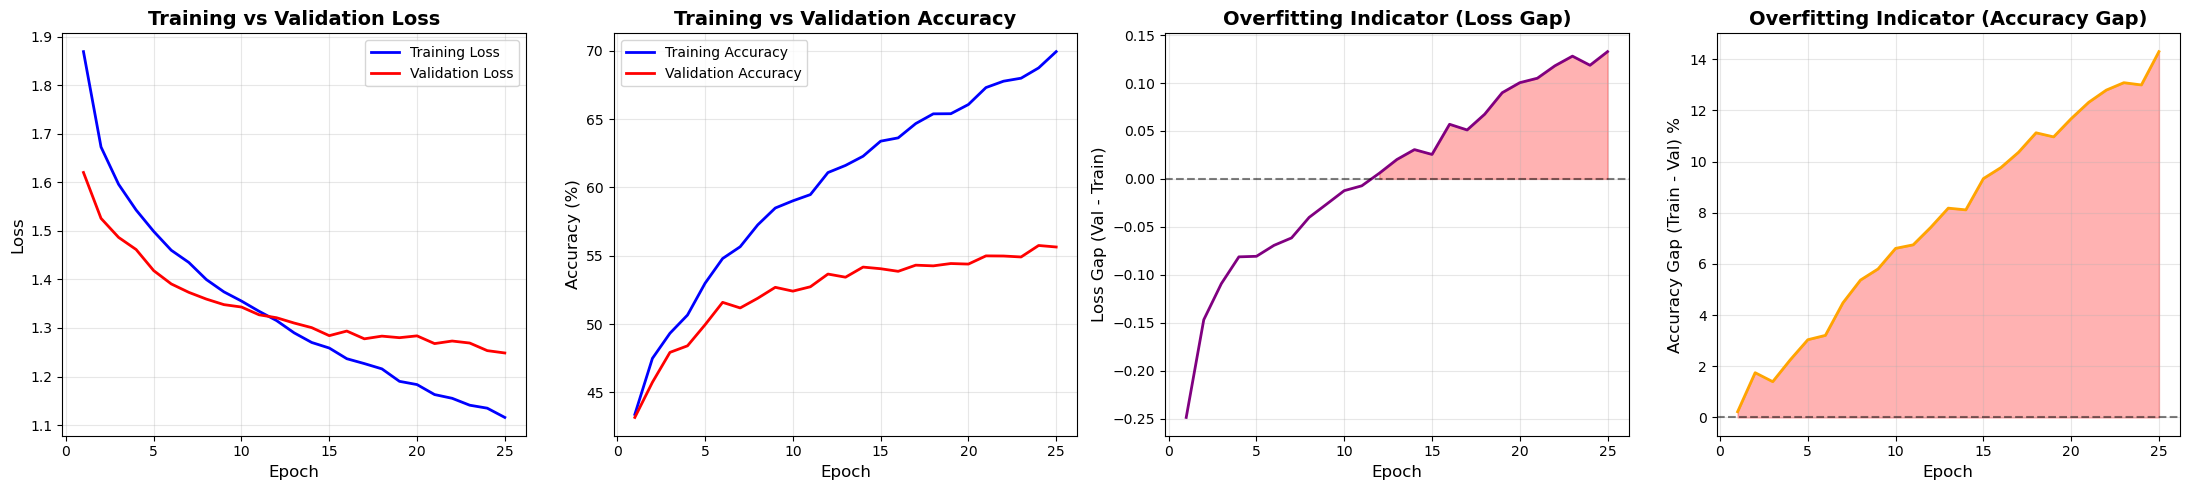

FINAL RESULTS:
Final Training Accuracy: 69.93%
Final Validation Accuracy: 55.64%
Final Training Loss: 1.1158
Final Validation Loss: 1.2485
Accuracy Gap: 14.29%
Loss Gap: 0.1327


In [15]:
import matplotlib.pyplot as plt

# Create figure with 2x2 subplots
fig, axes = plt.subplots(1, 4, figsize=(22, 5))

epochs_range = range(1, len(history['train_loss']) + 1)

# Graph 1: Training and Validation Loss
axes[0], axes[0].plot(epochs_range, history['train_loss'], 'b-', label='Training Loss', linewidth=2)
axes[0], axes[0].plot(epochs_range, history['val_loss'], 'r-', label='Validation Loss', linewidth=2)
axes[0], axes[0].set_xlabel('Epoch', fontsize=12)
axes[0], axes[0].set_ylabel('Loss', fontsize=12)
axes[0], axes[0].set_title('Training vs Validation Loss', fontsize=14, fontweight='bold')
axes[0], axes[0].legend(fontsize=10)
axes[0], axes[0].grid(True, alpha=0.3)

# Graph 2: Training and Validation Accuracy
axes[0], axes[1].plot(epochs_range, [acc * 100 for acc in history['train_acc']], 'b-', label='Training Accuracy', linewidth=2)
axes[0], axes[1].plot(epochs_range, [acc * 100 for acc in history['val_acc']], 'r-', label='Validation Accuracy', linewidth=2)
axes[0], axes[1].set_xlabel('Epoch', fontsize=12)
axes[0], axes[1].set_ylabel('Accuracy (%)', fontsize=12)
axes[0], axes[1].set_title('Training vs Validation Accuracy', fontsize=14, fontweight='bold')
axes[0], axes[1].legend(fontsize=10)
axes[0], axes[1].grid(True, alpha=0.3)

# Graph 3: Loss Gap (Overfitting indicator)
loss_gap = [val - train for train, val in zip(history['train_loss'], history['val_loss'])]
axes[0], axes[2].plot(epochs_range, loss_gap, 'purple', linewidth=2)
axes[0], axes[2].axhline(y=0, color='black', linestyle='--', alpha=0.5)
axes[0], axes[2].set_xlabel('Epoch', fontsize=12)
axes[0], axes[2].set_ylabel('Loss Gap (Val - Train)', fontsize=12)
axes[0], axes[2].set_title('Overfitting Indicator (Loss Gap)', fontsize=14, fontweight='bold')
axes[0], axes[2].grid(True, alpha=0.3)
axes[0], axes[2].fill_between(epochs_range, 0, loss_gap, where=[gap > 0 for gap in loss_gap], 
                         color='red', alpha=0.3, label='Overfitting')

# Graph 4: Accuracy Gap
acc_gap = [(train - val) * 100 for train, val in zip(history['train_acc'], history['val_acc'])]
axes[0], axes[3].plot(epochs_range, acc_gap, 'orange', linewidth=2)
axes[0], axes[3].axhline(y=0, color='black', linestyle='--', alpha=0.5)
axes[0], axes[3].set_xlabel('Epoch', fontsize=12)
axes[0], axes[3].set_ylabel('Accuracy Gap (Train - Val) %', fontsize=12)
axes[0], axes[3].set_title('Overfitting Indicator (Accuracy Gap)', fontsize=14, fontweight='bold')
axes[0], axes[3].grid(True, alpha=0.3)
axes[0], axes[3].fill_between(epochs_range, 0, acc_gap, where=[gap > 0 for gap in acc_gap], 
                         color='red', alpha=0.3, label='Overfitting')

plt.tight_layout()
plt.show()

# Print final metrics
print(f"FINAL RESULTS:")
print(f"Final Training Accuracy: {history['train_acc'][-1] * 100:.2f}%")
print(f"Final Validation Accuracy: {history['val_acc'][-1] * 100:.2f}%")
print(f"Final Training Loss: {history['train_loss'][-1]:.4f}")
print(f"Final Validation Loss: {history['val_loss'][-1]:.4f}")
print(f"Accuracy Gap: {(history['train_acc'][-1] - history['val_acc'][-1]) * 100:.2f}%")
print(f"Loss Gap: {history['val_loss'][-1] - history['train_loss'][-1]:.4f}")